### Задача классификации

In [33]:
%pip install matplotlib seaborn numpy pandas scikit-learn kagglehub imblearn

Note: you may need to restart the kernel to use updated packages.


### Датасет


In [34]:
import pandas as pd

data = pd.read_csv("./adult.csv") # https://www.kaggle.com/datasets/wenruliu/adult-income-dataset
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [36]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## KNN
### Создание бейзлайна и оценка качества

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import pandas as pd

In [38]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

features = ['workclass','race','gender', 'occupation', 'native-country', 'education', 'relationship', 'marital-status', 'income']
label_encoder = LabelEncoder()

for col in features:
    data[col] = label_encoder.fit_transform(data[col])

In [39]:
X = data.drop(['income'], axis=1)
y = data['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.pipeline import Pipeline


pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier(n_neighbors=2))
])


pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("KNN result")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

KNN result
Accuracy: 0.8205548162555021
F1: 0.5203830369357045


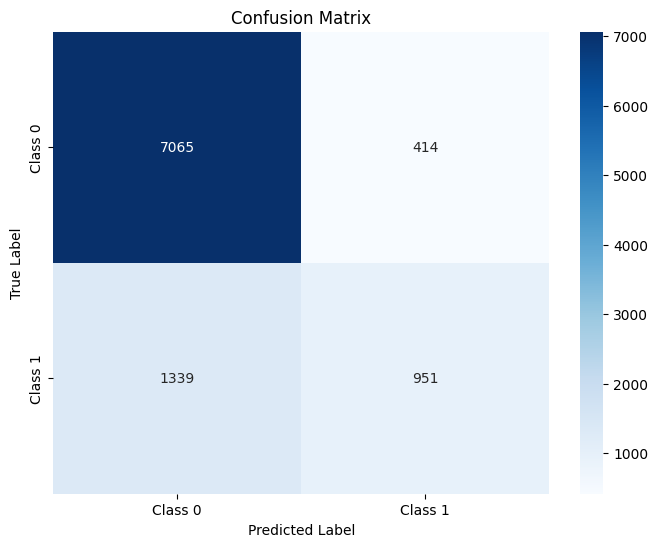

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
labels = ["Class 0", "Class 1"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Улучшение бейзлайна
Исследуем датасет и визуализируем некоторую информацию

In [42]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

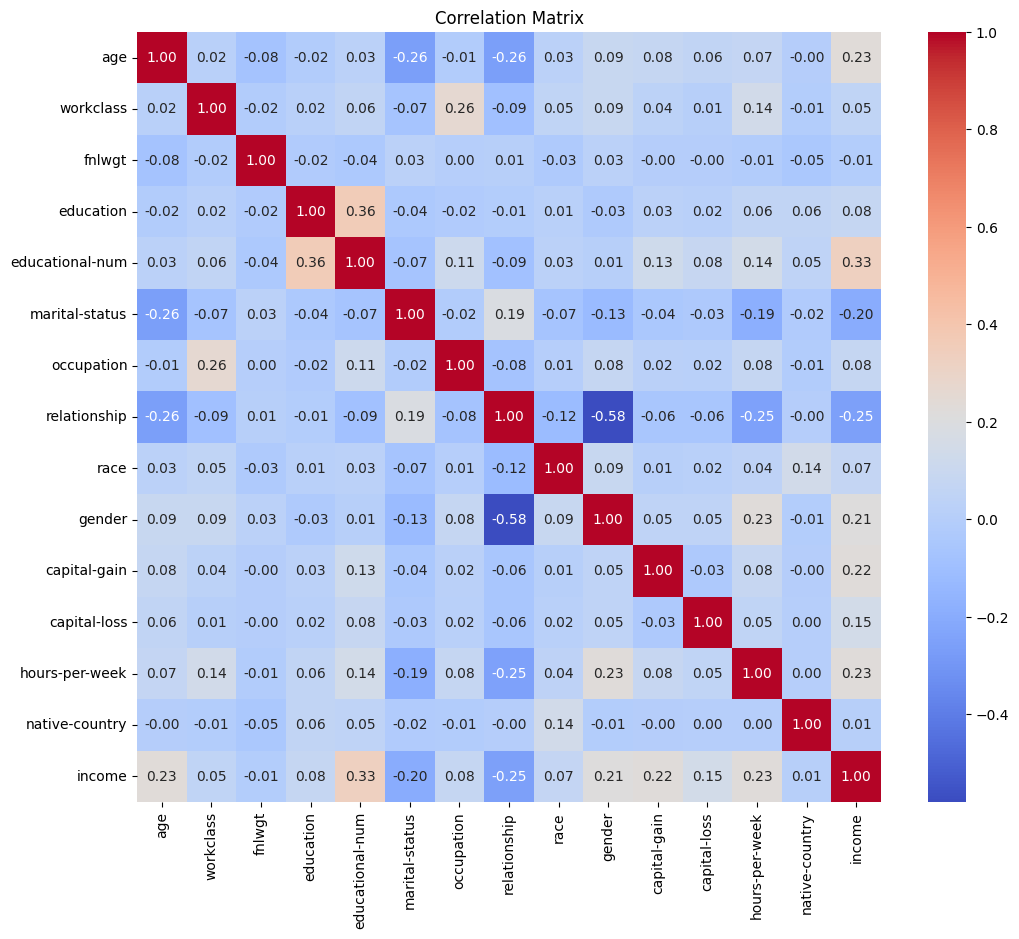

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

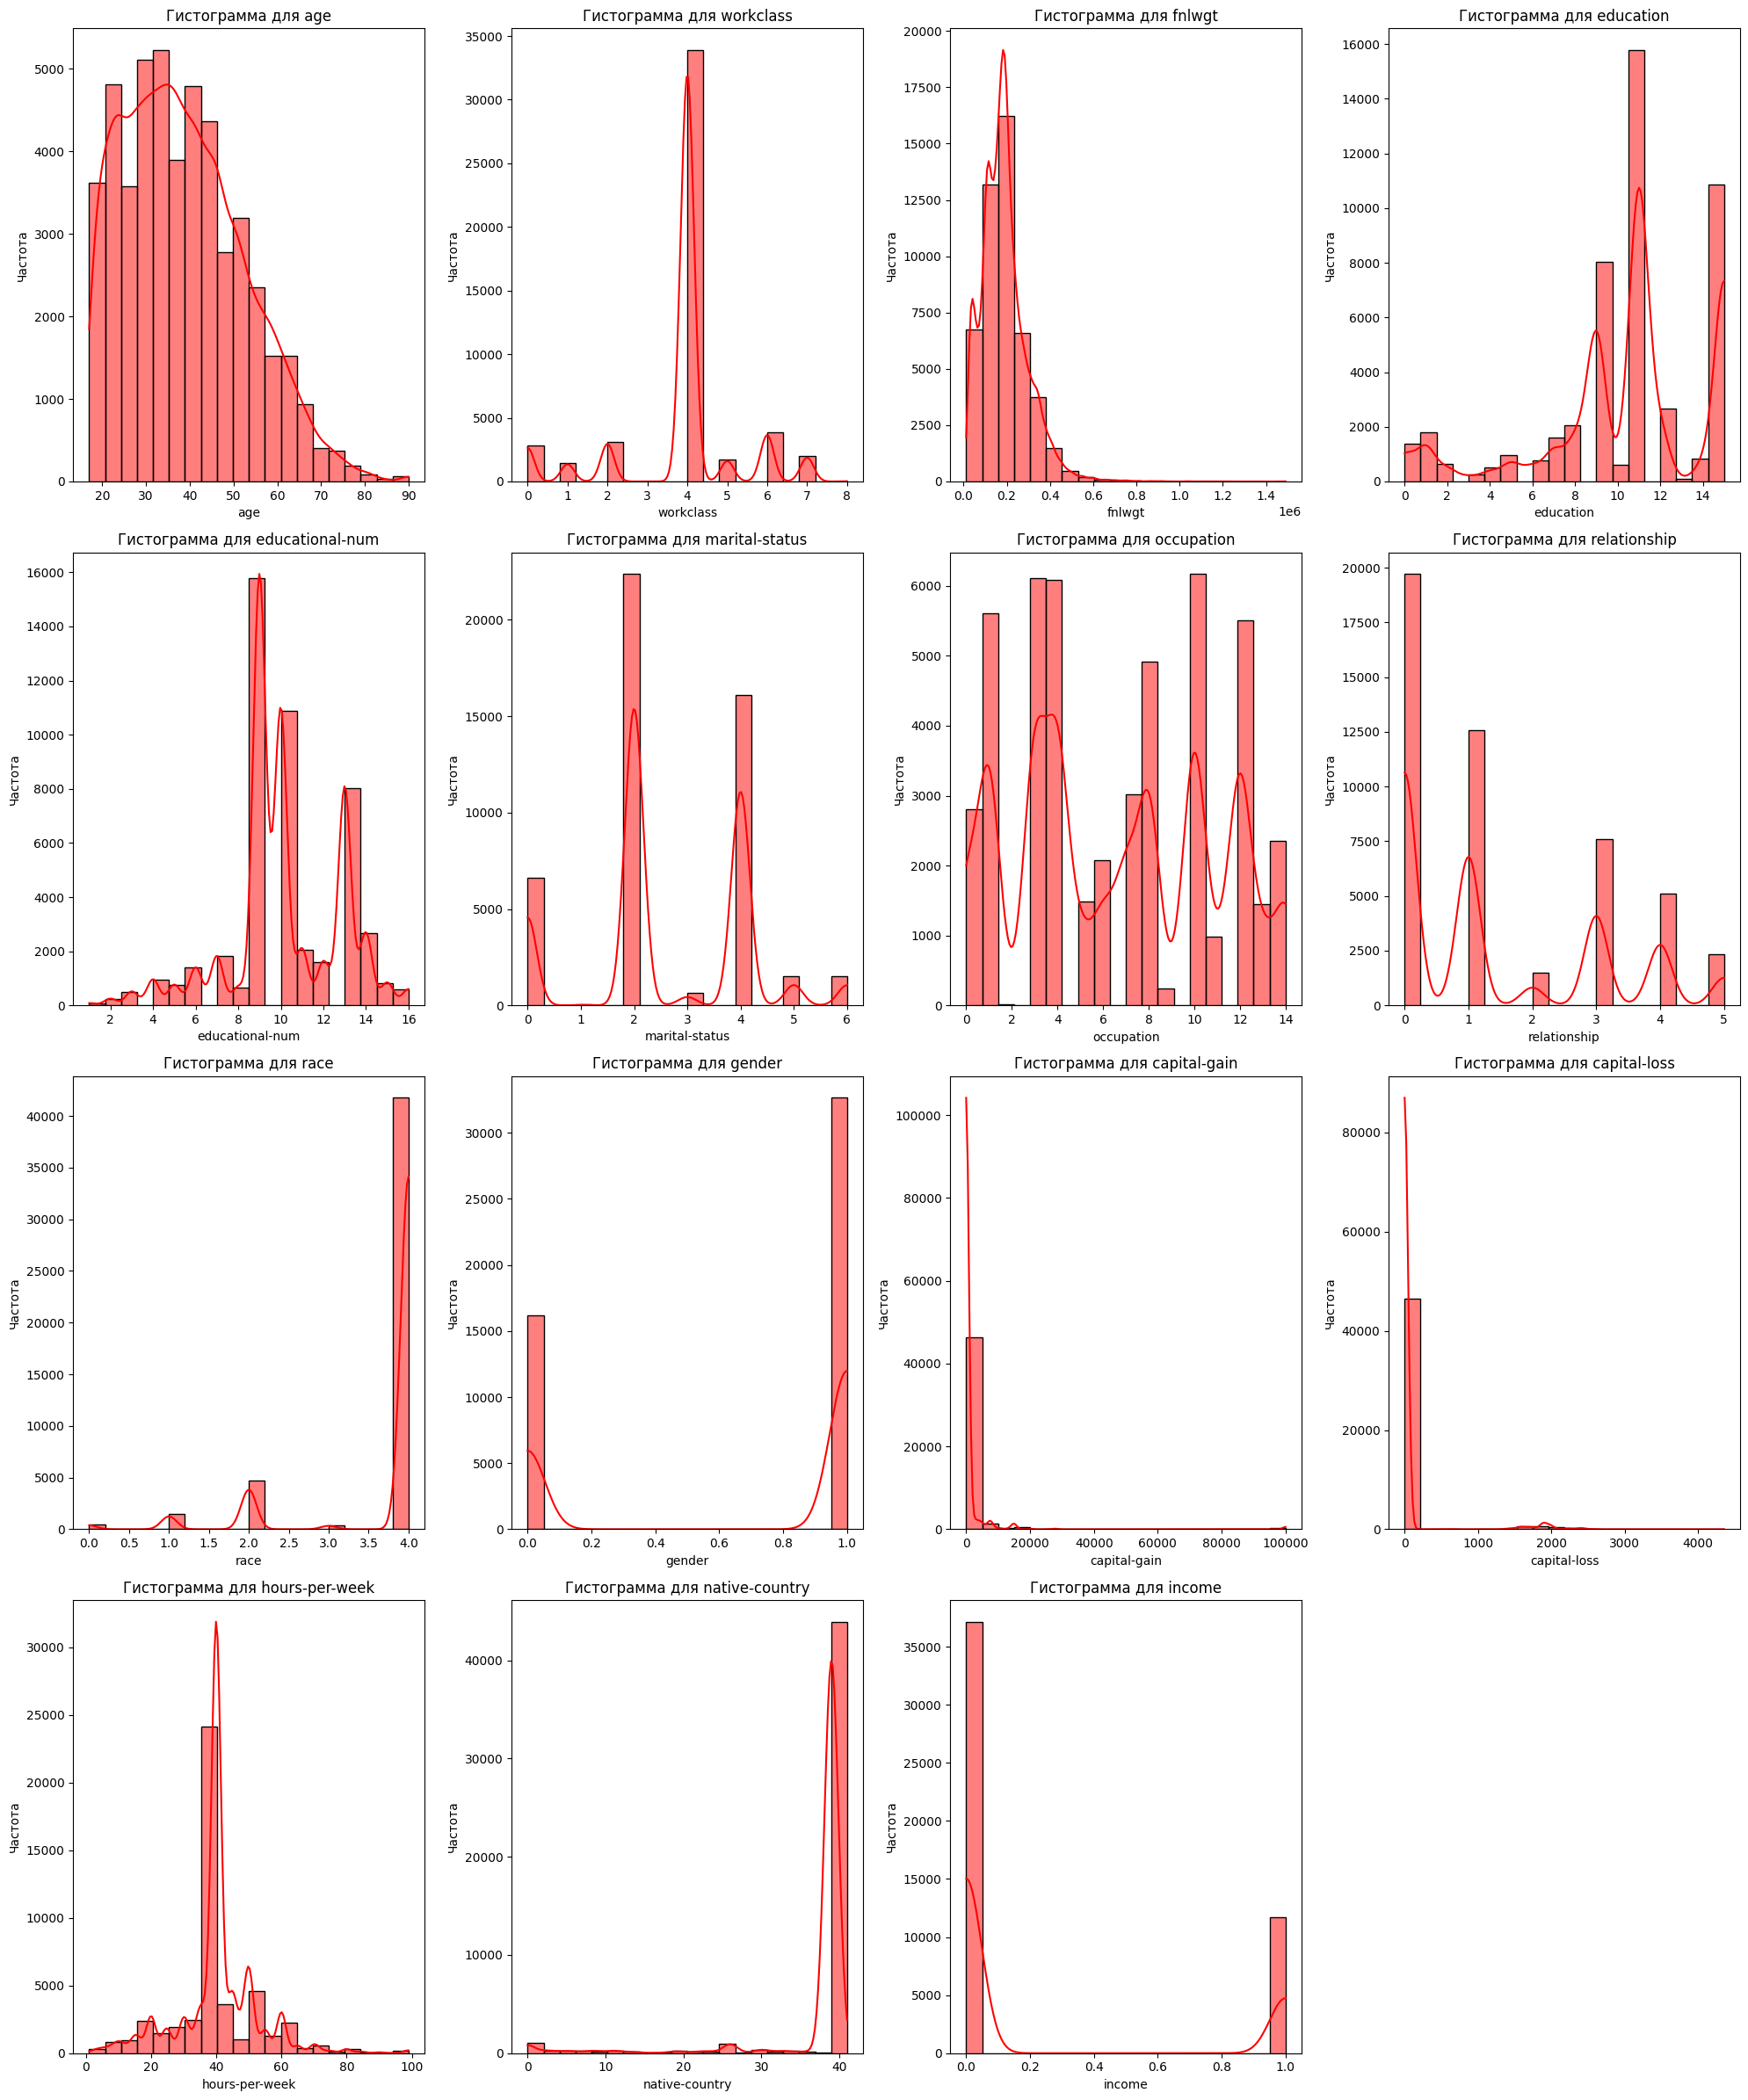

In [44]:
numerical_columns = data.select_dtypes(include=["number"]).columns
n_cols = 4
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()
for idx, col in enumerate(numerical_columns):
    sns.histplot(data[col], kde=True, ax=axes[idx], color='red', bins=20)
    axes[idx].set_title(f'Гистограмма для {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Частота')
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

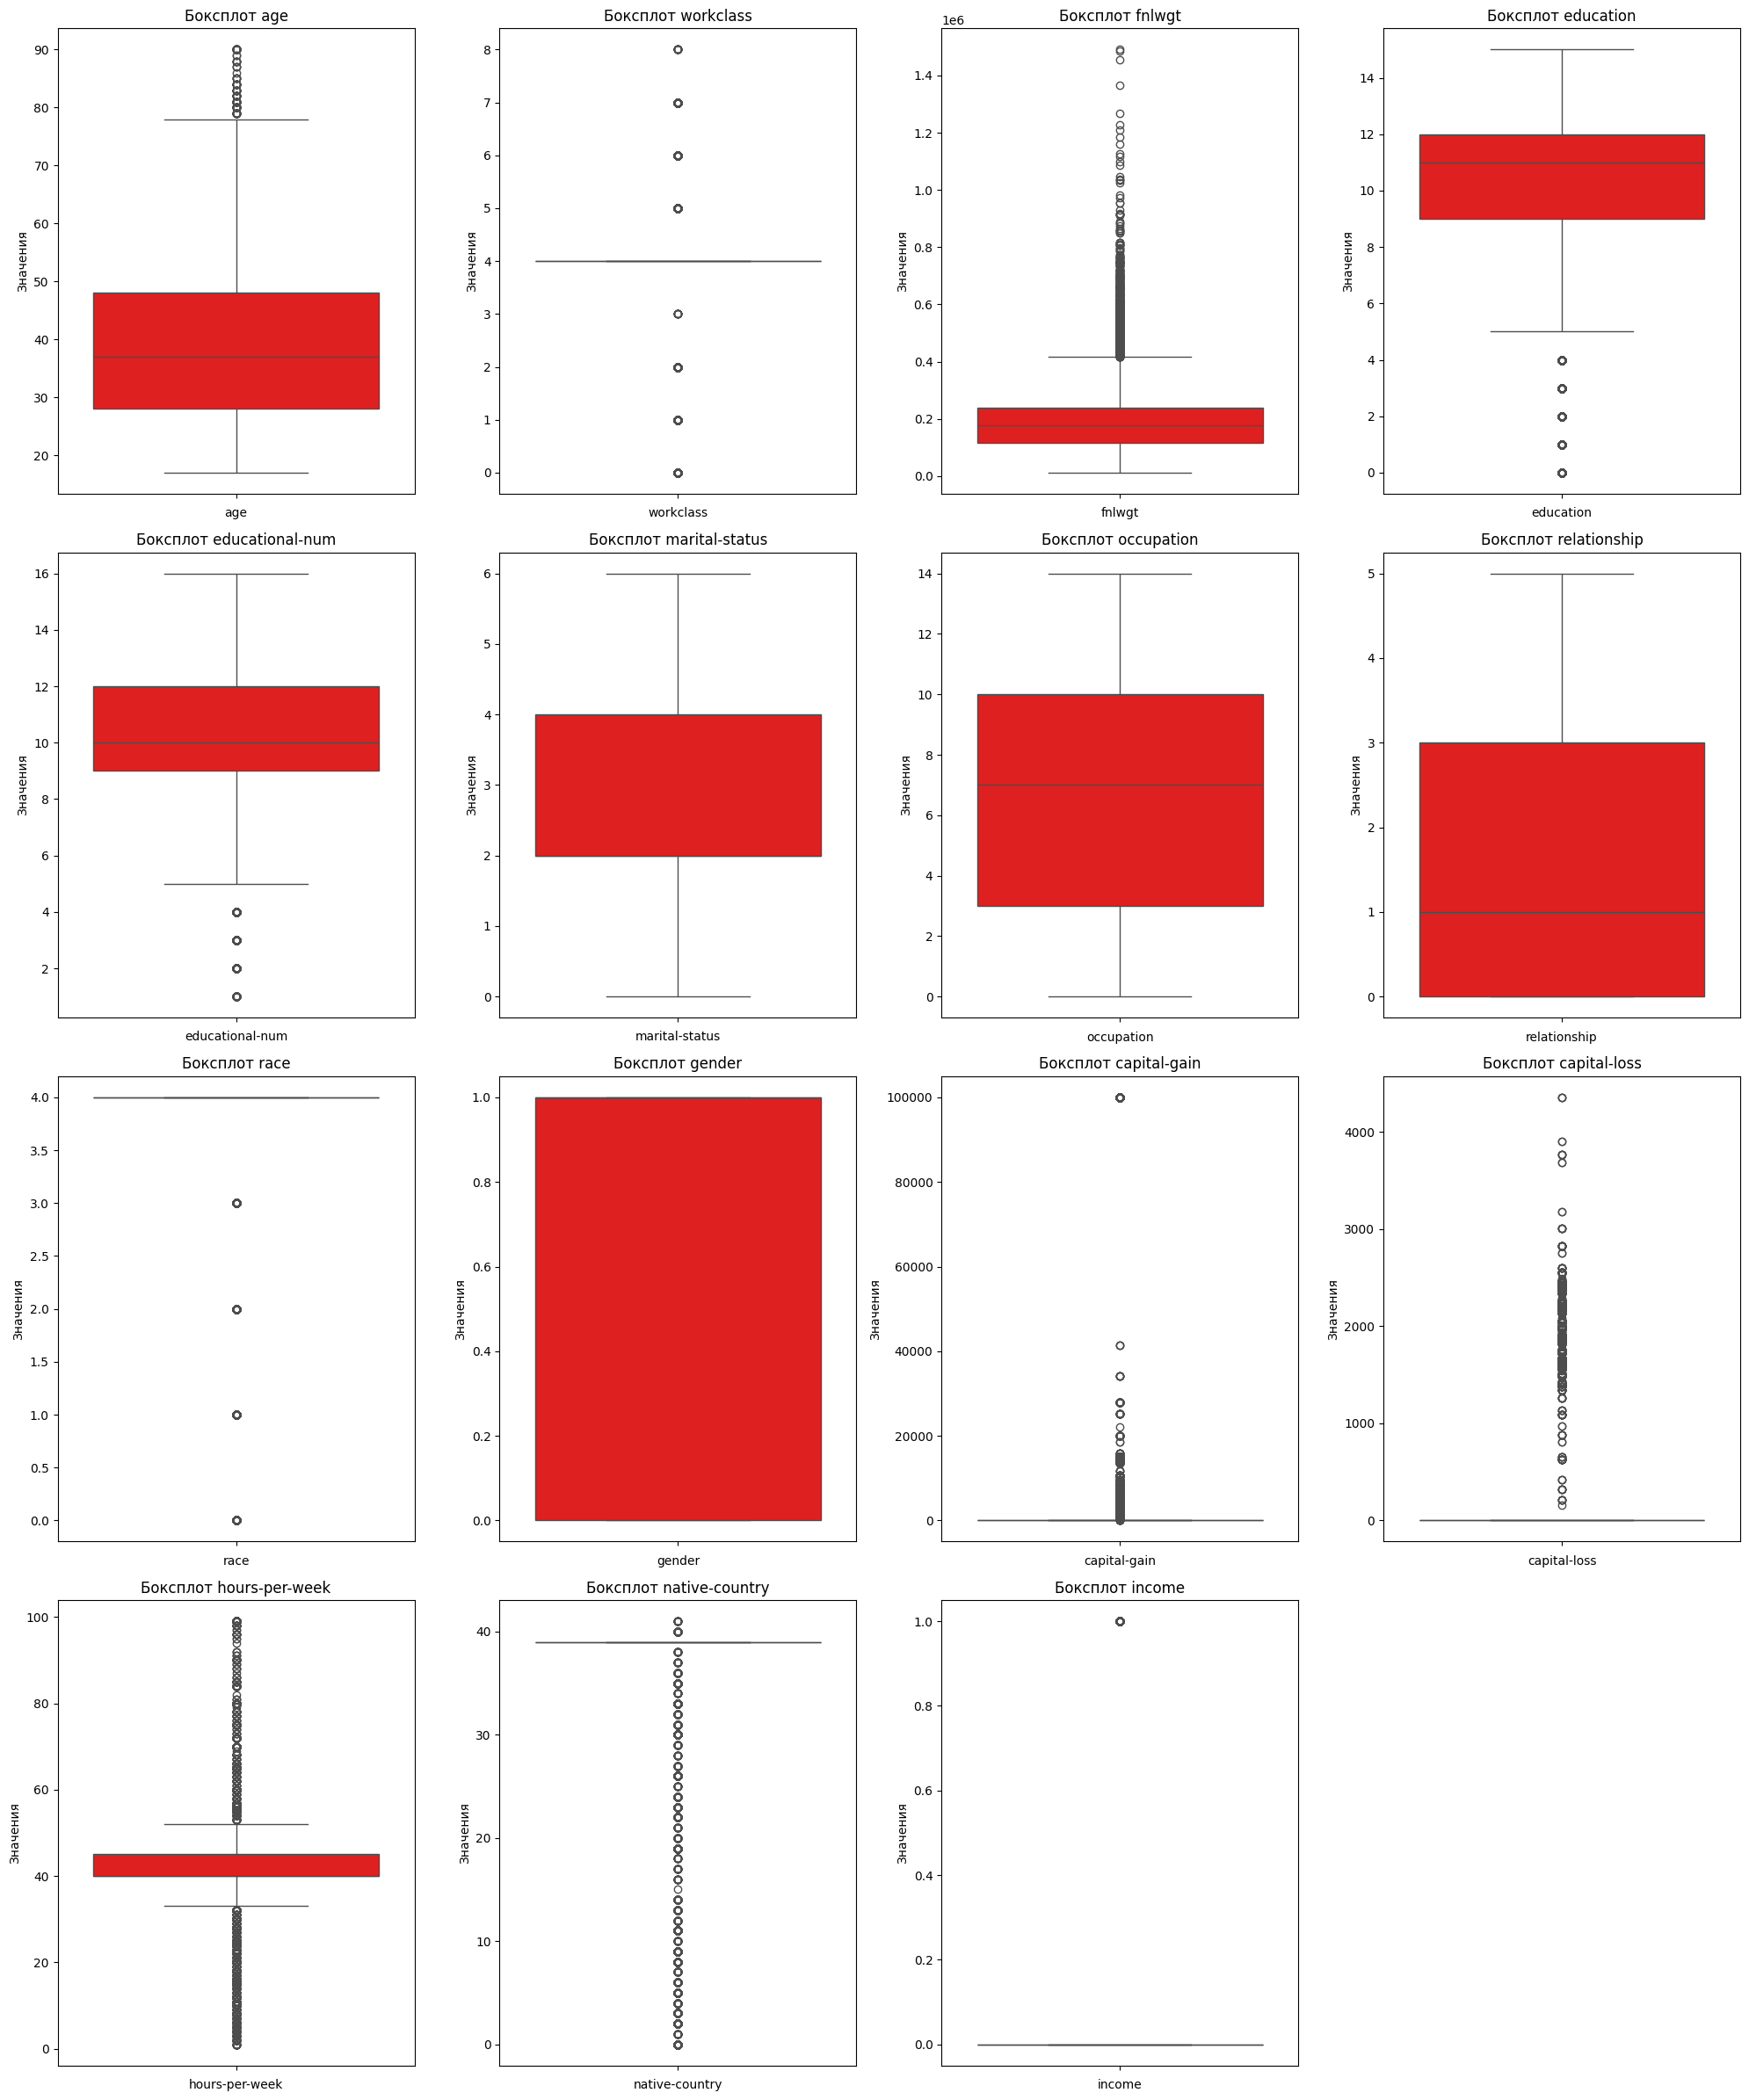

In [45]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 6))
axes = axes.flatten()
numerical_columns = data.select_dtypes(include=['number']).columns
for idx, col in enumerate(numerical_columns):
    sns.boxplot(y=data[col], ax=axes[idx], color='red')
    axes[idx].set_title(f'Боксплот {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Значения')

for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

C целевой переменной у нас отрицательная корреляция с `relationship` и `martical-status `

запустим GridSearchCV для перебора гиперпараметров

In [46]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV


param_grid = {
    'classifier__n_neighbors': range(2, 10),
}

grid_search = GridSearchCV(pipeline, param_grid, cv=8, scoring=make_scorer(accuracy_score))
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Лучшие параметры: {best_params}")
print(f"Лучшая точность на кросс-валидации: {best_score}")

y_pred = grid_search.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

Лучшие параметры: {'classifier__n_neighbors': 9}
Лучшая точность на кросс-валидации: 0.8321856633780891
Accuracy: 0.8426655747773569
F1: 0.6429732868757259


### Имлементация алгоритмов машинного обучения

In [47]:
from scipy.spatial import distance

class KNNClassifier:
    def __init__(self, k=5):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = []
        for x in X.values:
            distances = distance.cdist(self.X_train.values, [x], metric='euclidean').ravel()
            k_indices = distances.argsort()[:self.k]
            k_labels = self.y_train.iloc[k_indices]
            most_common = k_labels.mode()[0]
            predictions.append(most_common)
        return np.array(predictions)


In [48]:
knn = KNNClassifier(k=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("KNN Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")

KNN Results:
Accuracy: 0.7938376497082609
F1: 0.3951951951951952


### Выводы
В библиотеке круче. Привести таблицу сравнения

## Логистическая и линейная регрессия
### Создание бейзлайна и оценка качества

In [49]:
from sklearn.linear_model import LogisticRegression


logReg = LogisticRegression(max_iter=1000, random_state=42)
logReg.fit(X_train,y_train)

y_pred = logReg.predict(X_test)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1: {f1_score(y_test, y_pred)}")


Logistic Regression Results:
Accuracy: 0.8096018016173611
F1: 0.4784071789119462


/Users/yikataev/Study/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Добавим полиномиальные признаки

In [50]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LogisticRegression(random_state=42, max_iter=1000)
model_poly.fit(X_train_poly, y_train)

# Оценка улучшенной модели
y_pred_poly = model_poly.predict(X_test_poly)

accuracy_poly = accuracy_score(y_test, y_pred_poly)
f1_poly = f1_score(y_test, y_pred_poly)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_poly}")
print(f"F1: {f1_poly}")

Logistic Regression Results:
Accuracy: 0.8122632818098066
F1: 0.48942093541202675


/Users/yikataev/Study/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Наши показатели немного улучшились

### Собственная реализация

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization_param=0.01):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization_param = regularization_param
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        
        num_samples, num_features = X.shape
        self.weights = np.random.randn(num_features) * 0.01  # Случайная инициализация
        self.bias = 0

        for i in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_model)
            
            dw = (1 / num_samples) * np.dot(X.T, (predictions - y)) + (self.regularization_param / num_samples) * self.weights
            db = (1 / num_samples) * np.sum(predictions - y)
           
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        # Масштабируем тестовые данные
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        
        linear_model = np.dot(X, self.weights) + self.bias
        predictions = self.sigmoid(linear_model)
        return [1 if i > 0.5 else 0 for i in predictions]



In [55]:
model = LogisticRegression(learning_rate=0.01, num_iterations=1000)
X_train = np.array(X_train, dtype=np.float64)
y_train = np.array(y_train, dtype=np.float64)

model.fit(X_train, y_train)

y_pred = model.predict(np.array(X_test, dtype=np.float64))

accuracy_poly = accuracy_score(y_test, y_pred)
f1_poly = f1_score(y_test, y_pred)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_poly}")
print(f"F1: {f1_poly}")

Logistic Regression Results:
Accuracy: 0.8213737332377931
F1: 0.5285058092407457


Моя реализация оказалась даже более точной, чем библиотечная.